## Tweet Sentiment Extraction
### 1. EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import jaccard

In [2]:
train = pd.read_csv('tweet-sentiment-extraction/train.csv')
test = pd.read_csv('tweet-sentiment-extraction/test.csv')
sub = pd.read_csv('tweet-sentiment-extraction/sample_submission.csv')

In [3]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


27481 tweets in the train set and 3534 tweets in the test set

In [5]:
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


#### Dealing with missing values

In [6]:
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [8]:
# 1 missing value from the train set can be dropped:
train.dropna(axis = 0, how ='any',inplace=True)

#### Distribution of the sentiment classes

In [9]:
train['sentiment'].value_counts(normalize=True)

neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64

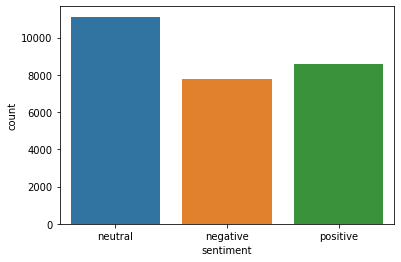

In [10]:
sns.countplot(x='sentiment',data=train);

#### Generating additional meta features 
1. Jaccard score between text and selected text
2. Number of words in text
3. Number of words in selected text
4. Difference between number of words in text and selected text

In [11]:
results_jaccard=[]

for i,row in train.iterrows():
    str1 = row.text
    str2 = row.selected_text
    jaccard_score = jaccard(str1,str2)
    results_jaccard.append([str1,str2,jaccard_score])

In [12]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [13]:
# number of words in selected_text column
train['selected_text_length'] = train['selected_text'].apply(lambda x:len(str(x).split())) 
# number of words in text column
train['text_length'] = train['text'].apply(lambda x:len(str(x).split())) 
# difference in the length of the text and selected_text column
train['length_difference'] = train['text_length'] - train['selected_text_length'] 

In [14]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,selected_text_length,text_length,length_difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


#### Distribution of number of words in selected texts for every sentiment

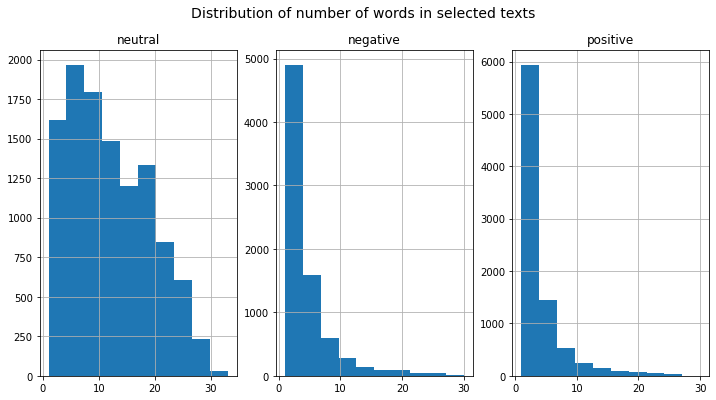

In [15]:
sentiment=train.sentiment.unique()
fig,ax= plt.subplots(1,3,figsize=(12,6))
for i in range(0,3):
    train[train['sentiment']==sentiment[i]]['selected_text_length'].hist(ax=ax[i])
    ax[i].set_title(sentiment[i])
fig.suptitle("Distribution of number of words in selected texts", fontsize=14);

#### Difference in Jaccard scores across sentiments

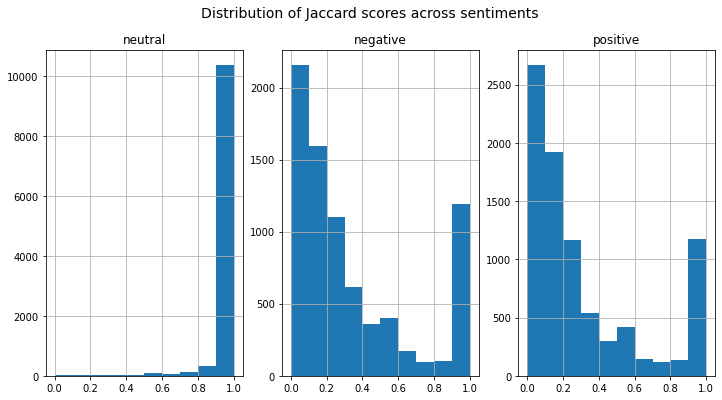

In [16]:
fig,ax= plt.subplots(1,3,figsize=(12,6))
for i in range(0,3):
    train[train['sentiment']==sentiment[i]]['jaccard_score'].hist(ax=ax[i])
    ax[i].set_title(sentiment[i])
fig.suptitle("Distribution of Jaccard scores across sentiments", fontsize=14);